Import packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Download the data

In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-02-06 17:18:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   157KB/s    in 0.5s    

2022-02-06 17:18:37 (157 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Read the data

In [ ]:
df = pd.read_csv('FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Explore the data

In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Select some features (Engine Size, Cylinder number, Fuel consumption etc.) and create new DataFrame

In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Let's plot these features (using a Histogram)

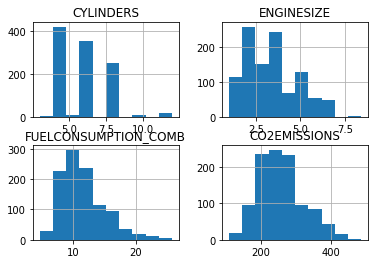

In [ ]:
#create new DataFrame
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
# create histogram using .hist()
viz.hist()
plt.show()

Plot these values against the CO2 Emissions

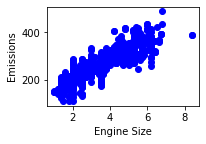

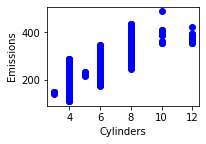

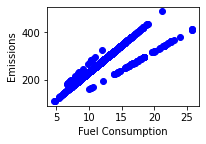

In [ ]:
plt.subplot(2,2,1)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

plt.subplot(2,2,2)
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

plt.subplot(2,2,3)
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emissions")
plt.show()

Creating the Train and Test datasets:

80% of dataset used for training

20% of dataset used for testing

Mask selects random rows using np.random.rand() function



In [ ]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask] #80%
test = cdf[~mask]

#Simple Regression Model

Distribution of train data found above

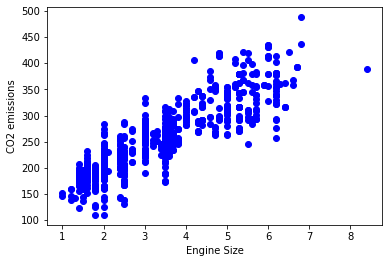

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 emissions")
plt.show()

Use sklearn to model data

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression() #sklearn class: sklearn.linear_model.LinearRegression() is the Ordinary Least Squares Regression

train_x = np.asanyarray(train[['ENGINESIZE']]) #why two [] square brackets
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

#the coefficients of simple linear regression
print('Coefficients:', regr.coef_) #coef_ is attribute of class
print('Intercept', regr.intercept_) #intercept_ is attribute of class

Coefficients: [[39.64313111]]
Intercept [122.63521773]


Plot the fit line we found, over the original data we plotted two cells ago

<function matplotlib.pyplot.show>

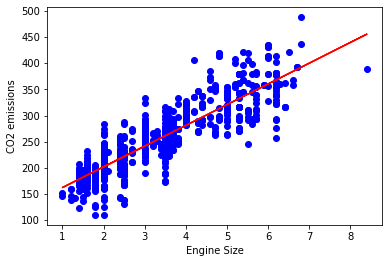

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #not sure about the y part of the plot...  why multiply train_x by regr.coef_[0][0]
plt.xlabel("Engine Size")
plt.ylabel("CO2 emissions")
plt.show

#Evaluation

Compare actual values vs predicted values

We use the test dataset to calculate

**Mean absolute error, residual sum of squares, R2-score**

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x) #this is the prediction

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score:  %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 21.24
Residual sum of squares (MSE): 736.03
R2-score:  0.79


To make a prediction using the test_x data

In [ ]:
predictions = regr.predict(test_x)